In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r'C:\Users\lvkaj\Downloads\Employee Attrition.csv')

# Display the first few rows of the dataset
df.head()

# Step 1: Summary of the data
print("Data Info:")
df.info()  # Check for missing values, data types, etc.

# Step 2: Missing values check
print("Missing Values:")
print(df.isnull().sum())



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel     

Basic Statistics:
               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.

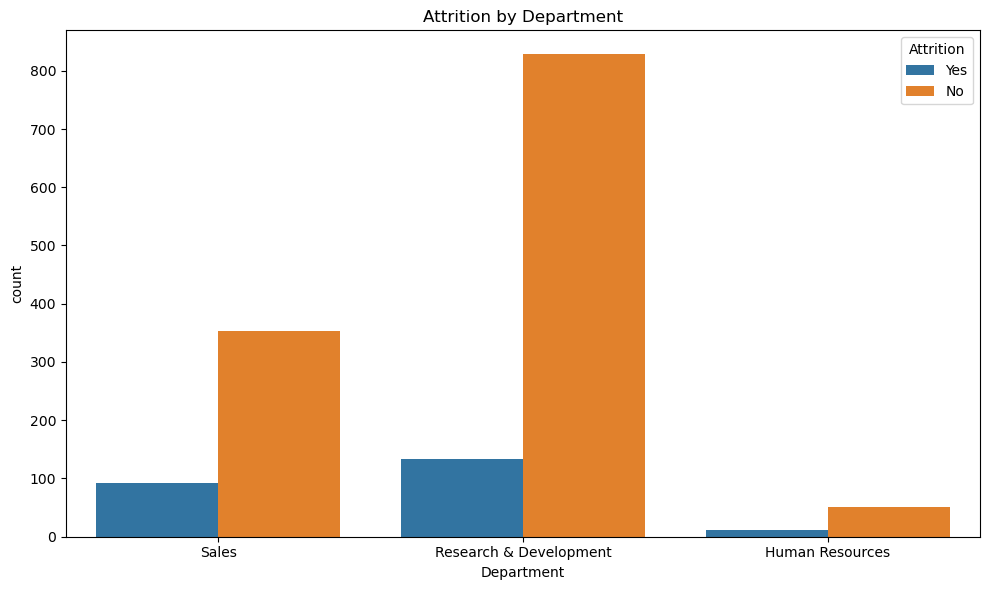

In [5]:
# Step 3: Basic statistics for numerical columns
print("Basic Statistics:")
print(df.describe())

# Step 4: Exploratory Data Analysis (EDA)

# Visualize the distribution of attrition by department, job role, and education level

plt.figure(figsize=(10,6))
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title('Attrition by Department')
plt.tight_layout()
plt.show()



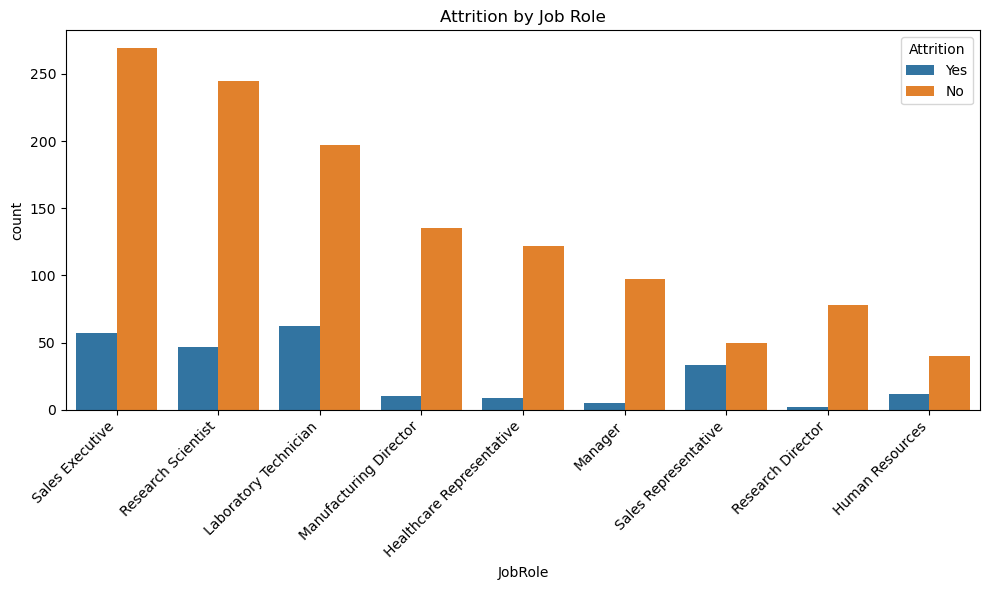

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(x='JobRole', hue='Attrition', data=df)
plt.title('Attrition by Job Role')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



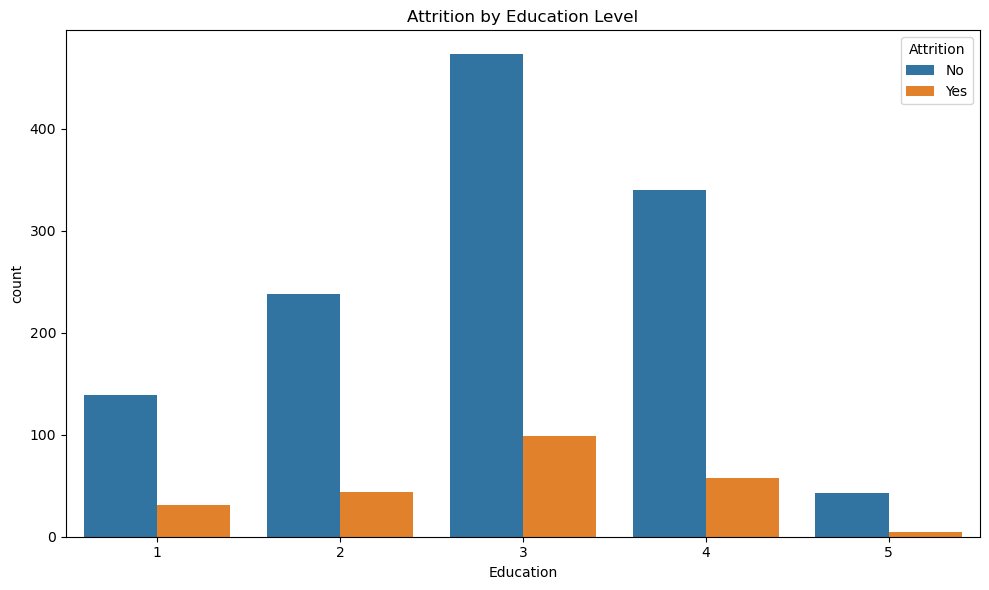

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(x='Education', hue='Attrition', data=df)
plt.title('Attrition by Education Level')
plt.tight_layout()
plt.show()



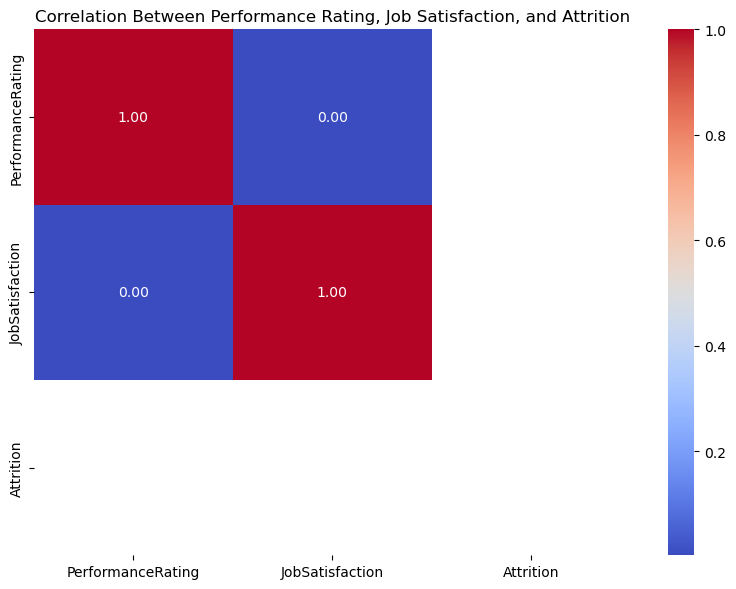

In [10]:
# Step 5: Correlation between performance ratings, job satisfaction, and attrition

# Create correlation heatmap
correlation_matrix = df[['PerformanceRating', 'JobSatisfaction', 'Attrition']].apply(pd.to_numeric, errors='coerce')
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Performance Rating, Job Satisfaction, and Attrition')
plt.tight_layout()
plt.show()



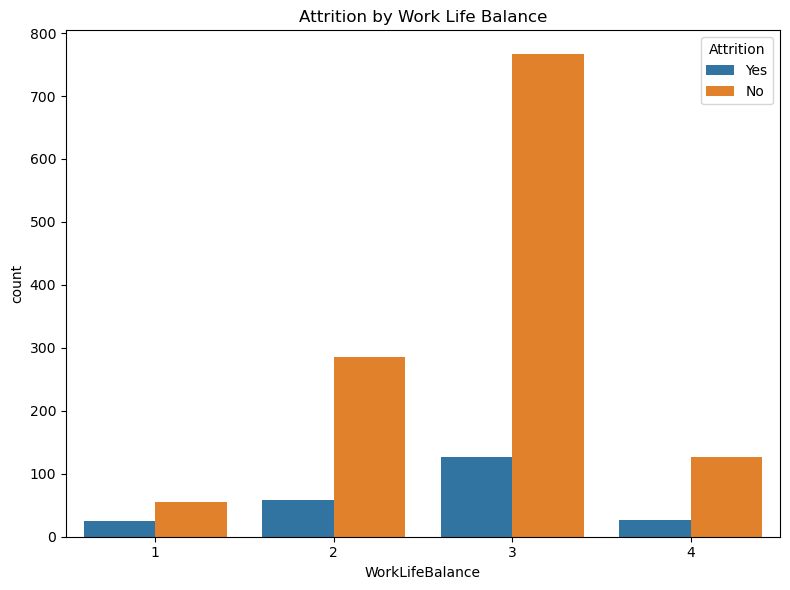

In [12]:
# Step 6: Effect of work-life balance on attrition rates

plt.figure(figsize=(8,6))
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df)
plt.title('Attrition by Work Life Balance')
plt.tight_layout()
plt.show()



In [13]:
# Step 7: Create pivot tables and use SQL (not in code but description for SQL part)

# SQL-like code to analyze DistanceFromHome and JobRole by Attrition in pandas
pivot_df = df.pivot_table(index='JobRole', columns='Attrition', values='DistanceFromHome', aggfunc='mean')
print("Pivot Table: Distance From Home by Job Role and Attrition")
print(pivot_df)



Pivot Table: Distance From Home by Job Role and Attrition
Attrition                        No        Yes
JobRole                                       
Healthcare Representative  9.204918  17.666667
Human Resources            6.600000  13.416667
Laboratory Technician      9.329949   9.661290
Manager                    7.927835  10.000000
Manufacturing Director     9.533333   8.800000
Research Director          8.474359   7.000000
Research Scientist         8.869388   9.765957
Sales Executive            9.026022  12.649123
Sales Representative       9.000000   8.151515


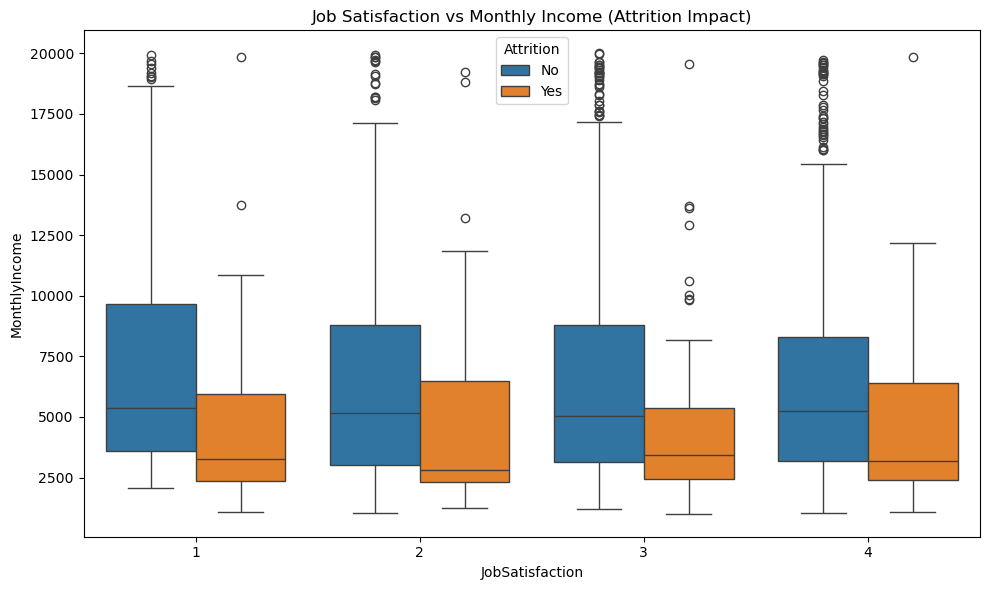

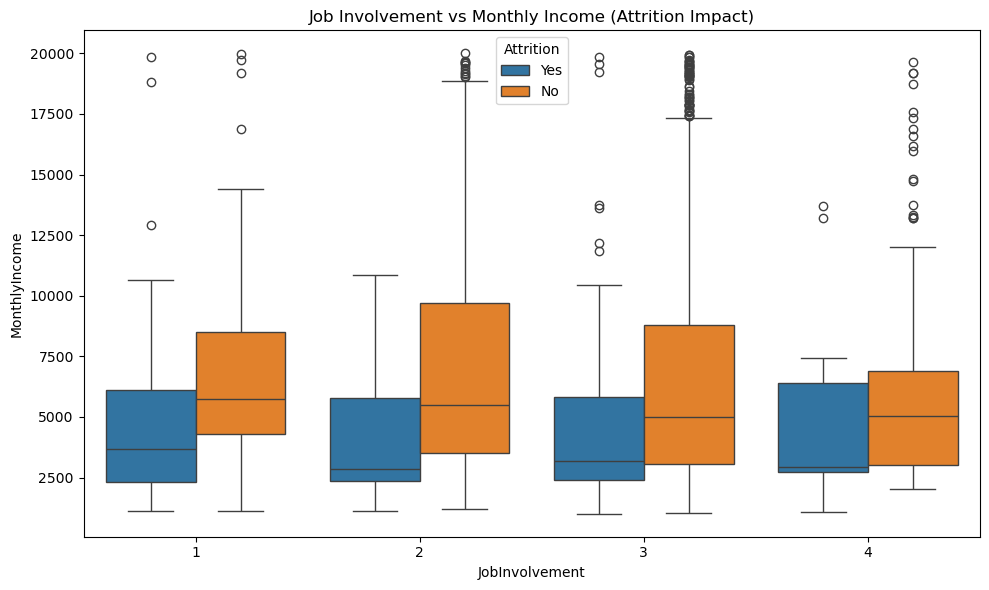

In [15]:
# Step 8: Analyze Key Factors Driving Attrition (looking for correlations)

# Investigate the impact of job satisfaction, salary, performance, and benefits on attrition
plt.figure(figsize=(10,6))
sns.boxplot(x='JobSatisfaction', y='MonthlyIncome', hue='Attrition', data=df)
plt.title('Job Satisfaction vs Monthly Income (Attrition Impact)')
plt.tight_layout()
plt.show()
plt.figure(figsize=(10,6))
sns.boxplot(x='JobInvolvement', y='MonthlyIncome', hue='Attrition', data=df)
plt.title('Job Involvement vs Monthly Income (Attrition Impact)')
plt.tight_layout()
plt.show()


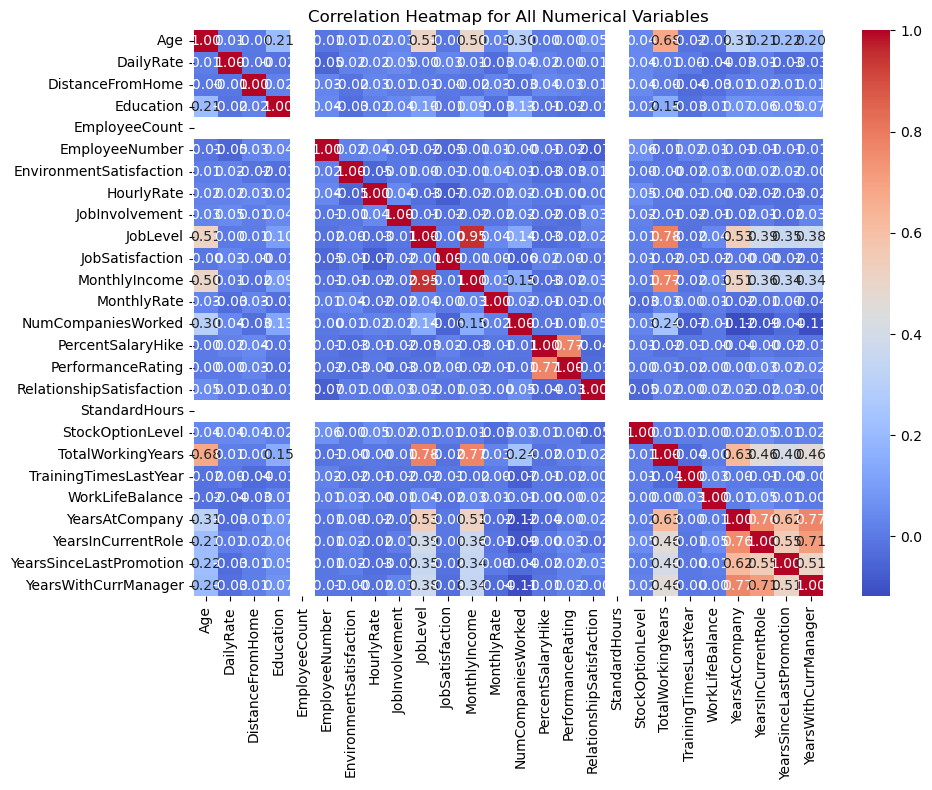

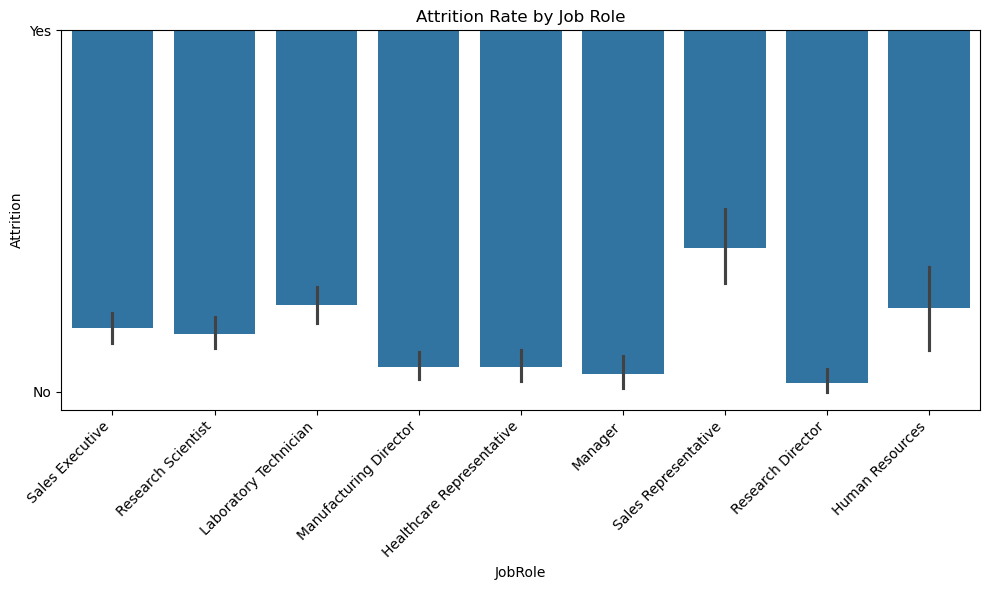

In [16]:

# Step 9: Create visualizations

# Create heatmap of correlations between different variables
correlation_matrix_all = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for All Numerical Variables')
plt.tight_layout()
plt.show()

# Bar plots to compare attrition rates across different features (e.g., JobRole, Education)
plt.figure(figsize=(10,6))
sns.barplot(x='JobRole', y='Attrition', data=df)
plt.title('Attrition Rate by Job Role')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



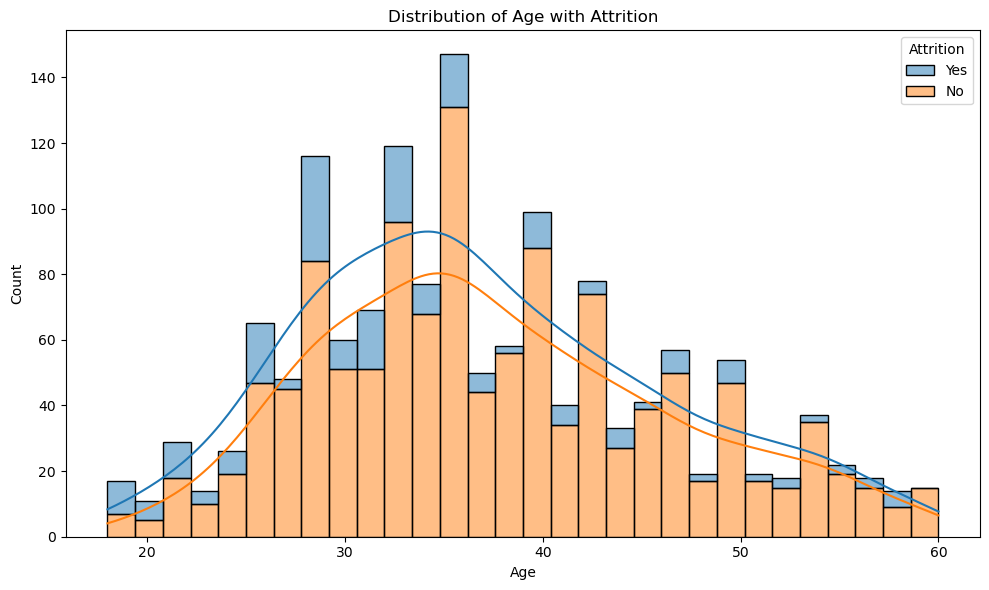

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Age with Attrition
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', kde=True, hue='Attrition', multiple='stack', bins=30)
plt.title('Distribution of Age with Attrition')
plt.tight_layout()
plt.show()


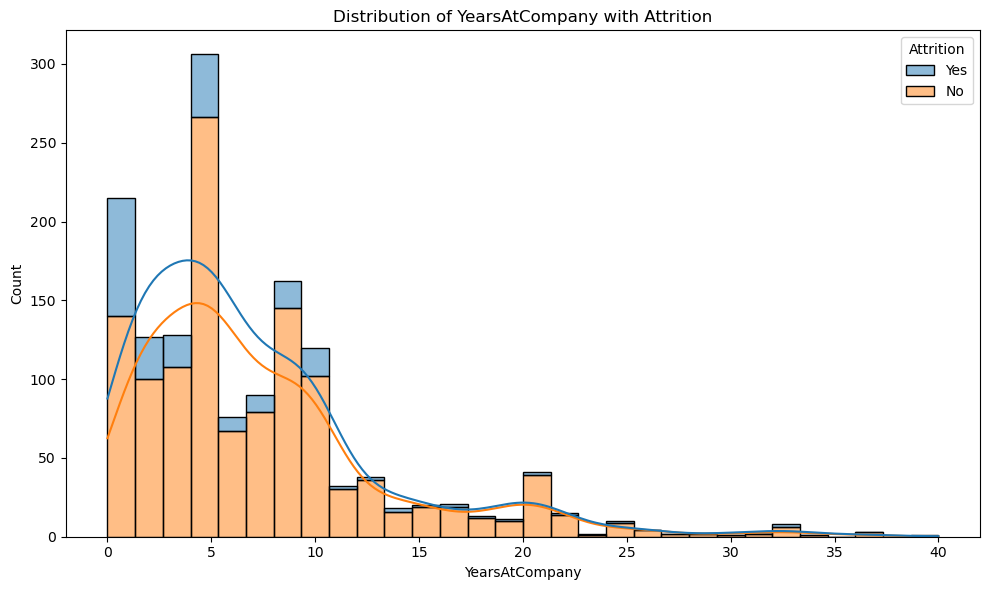

In [50]:
# Distribution of YearsAtCompany (Tenure) with Attrition
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='YearsAtCompany', kde=True, hue='Attrition', multiple='stack', bins=30)
plt.title('Distribution of YearsAtCompany with Attrition')
plt.tight_layout()
plt.show()


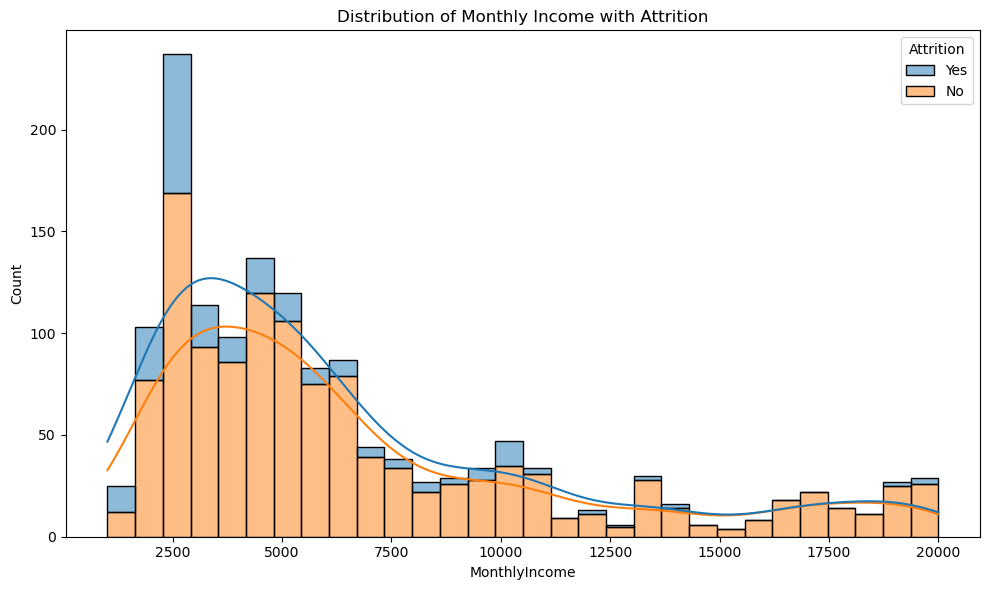

In [52]:

# Distribution of Monthly Income with Attrition
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='MonthlyIncome', kde=True, hue='Attrition', multiple='stack', bins=30)
plt.title('Distribution of Monthly Income with Attrition')
plt.tight_layout()
plt.show()